# Outline
1. [Frame the probelm and look at the big picture ](#1)
2. [Get the Data](#2)
3. [Explore the data to gain insights](#3)
4. [Prepare the data to better expose the underlying patterns to Machine Learning algorithms](#4)
5. [Explore many different models and short-list the best ones](#5)
6. [Fine-tune your models and combine them into a great solution](#6)
7. [Present your solution](#7)
8. [Launch, monitor, and maintain your system](#8)


<a name="1"></a>
# 1. Frame the Problem and look at the big picture
Use a Neural Network model that can identify hand written digits, using the MNIST dataset.


In [1]:
# Get the data.
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import numpy to work with numpy arrays.
import numpy as np

# Import tensorflow & functions to create the Neural Network.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu


%matplotlib widget
import matplotlib.pyplot as plt

#
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)

2023-11-29 22:06:29.135823: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 22:06:29.241681: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 22:06:29.241724: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 22:06:29.241765: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 22:06:29.268081: I tensorflow/core/platform/cpu_feature_g

<a name="2"></a>
# 2. Get the Data

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/home/jp/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# # load dataset
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

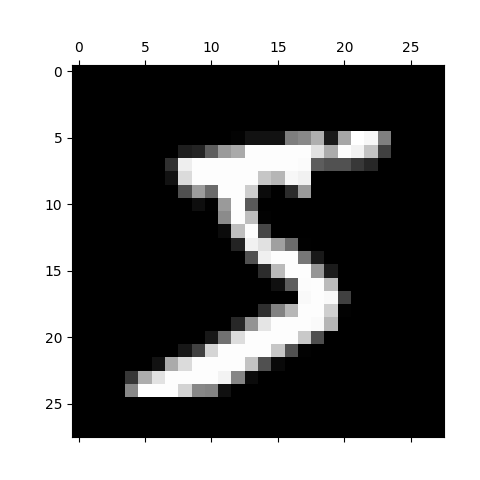

In [4]:
a = X[0].reshape(28, 28)
plt.matshow(a, cmap='gray')

In [5]:
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Split the Data

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")

print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (59500, 784)
the shape of the training set (target) is: (59500,)

the shape of the test set (input) is: (10500, 784)
the shape of the test set (target) is: (10500,)


In [8]:
X_train, X_test = X_train / 255, X_test / 255


In [9]:
tf.random.set_seed(51) # for consistent results
model = Sequential(
    [                     
        Dense(25, activation = 'relu', name="L1"),
        Dense(15, activation = 'relu', name="L2"),
        Dense(10, name="L3")

    ], name = "my_model" 
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model.fit(
    X_train,y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)

2023-11-29 22:06:52.922072: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 22:06:52.940004: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 22:06:52.940057: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 22:06:52.941930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 22:06:52.941995: I tensorflow/compile

Epoch 1/5


2023-11-29 22:06:54.731169: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-29 22:06:54.853553: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f1d22551960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-29 22:06:54.853615: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2023-11-29 22:06:54.861182: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-29 22:06:54.880578: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-29 22:06:54.977839: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1860/1860 [==============================] - 17s 8ms/step - loss: 0.4343 - accuracy: 0.8734 - val_loss: 0.2543 - val_accuracy: 0.9257
Epoch 2/5
1860/1860 [==============================] - 15s 8ms/step - loss: 0.2056 - accuracy: 0.9402 - val_loss: 0.2009 - val_accuracy: 0.9410
Epoch 3/5
1860/1860 [==============================] - 16s 8ms/step - loss: 0.1649 - accuracy: 0.9516 - val_loss: 0.1828 - val_accuracy: 0.9456
Epoch 4/5
1860/1860 [==============================] - 17s 9ms/step - loss: 0.1440 - accuracy: 0.9581 - val_loss: 0.1618 - val_accuracy: 0.9522
Epoch 5/5
1860/1860 [==============================] - 15s 8ms/step - loss: 0.1290 - accuracy: 0.9622 - val_loss: 0.1567 - val_accuracy: 0.9537


In [10]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

In [12]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    widgvis(fig)
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

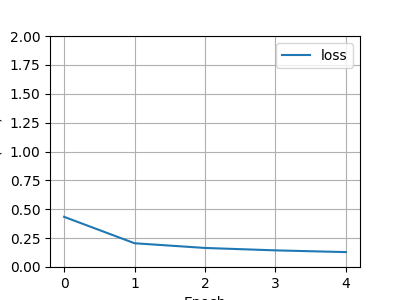

In [13]:
plot_loss_tf(history)

#### Prediction 
To make a prediction, use Keras `predict`. Below, X[1015] contains an image of a zero.

1/1 [==============================] - 0s 24ms/step
 predicting a Zero: 
[[  920.48 -1707.37  -874.4   -933.86 -1379.71    64.68 -1438.22 -1376.25
   -446.51  -430.51]]
 Largest Prediction index: 0


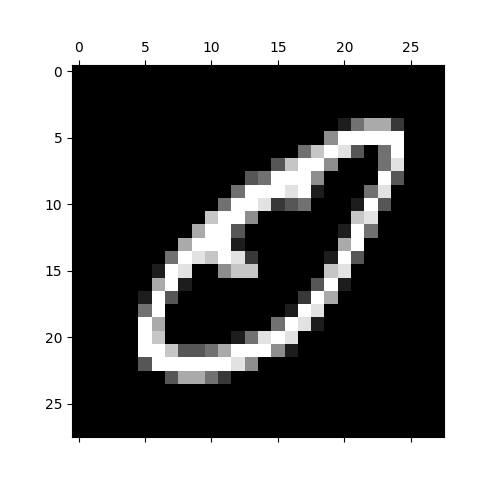

In [14]:
image_of_zero = X[1015]
# display_digit(image_of_two)

prediction = model.predict(image_of_zero.reshape(1,784))  # prediction
prediction = model.predict(image_of_zero.reshape(1,784))  # prediction

print(f" predicting a Zero: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")


b = image_of_zero.reshape(28, 28)
plt.matshow(b, cmap='gray')